## 分群法

### K-Means

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data[:, :4]
print(x.shape)
# print(x)

(150, 4)


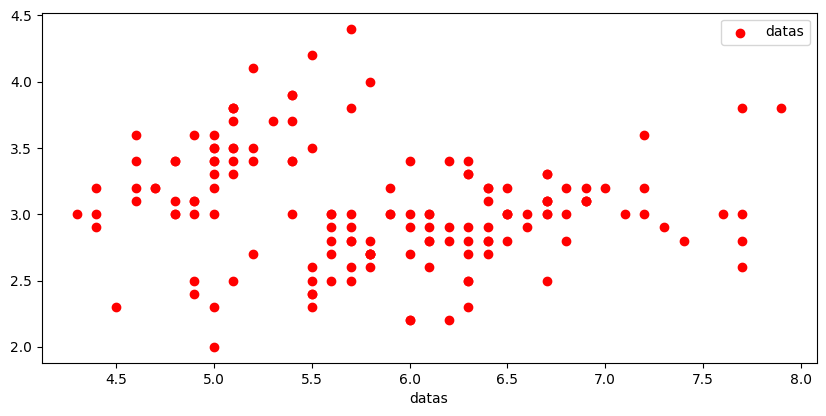

In [3]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(x[:, 0], x[:, 1],c="red", marker='o', label='datas')
plt.xlabel("datas")
plt.legend(loc=0)

In [4]:
# 分三群
# 操作名稱 = 分群算法(參數)
estimator = KMeans(n_clusters=3)

# 操作名稱.fit(數據)
estimator.fit(x)

# labels_ => 訓練完的結果
label_pred = estimator.labels_

label_pred

c:\Users\user\Desktop\venv\aiLearn\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

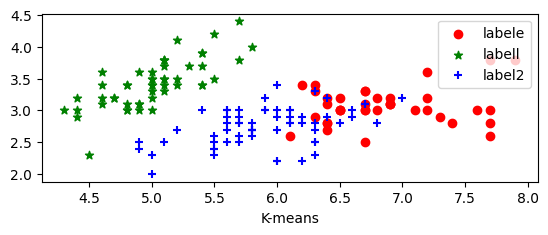

In [5]:
plt.subplot(2, 1, 2)
x0 = x[label_pred == 0]
x1 = x[label_pred == 1]
x2 = x[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c='red', marker='o', label='labele')
plt.scatter(x1[:, 0], x1[:, 1], c='green', marker='*', label='labell')
plt.scatter(x2[:, 0], x2[:, 1], c='blue', marker='+', label='label2')
plt.xlabel('K-means')
plt.legend(loc=0)

* 上圖有些點看起來是重疊的 => 因為實際上應該是三個維度

  => 但因為不好畫，我們畫二維

  => 所以將圖看成三維，實際上點是分開的

### DBSCAN

- 屬於分群演算法(不是分類)
- 無需標籤 => 非監督式學習
- 批評 K-Means 是用空間切割方式去分群
- 作法：每次群許多點

- 需定義兩個參數
    1. 半徑
    2. 最小點數  
        **核心概念：**  
        以某一點為圓心，以標準為半徑，若圈圈中的點數 $\geq$ 最小點數即為一群  
        => 不斷循環


In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt

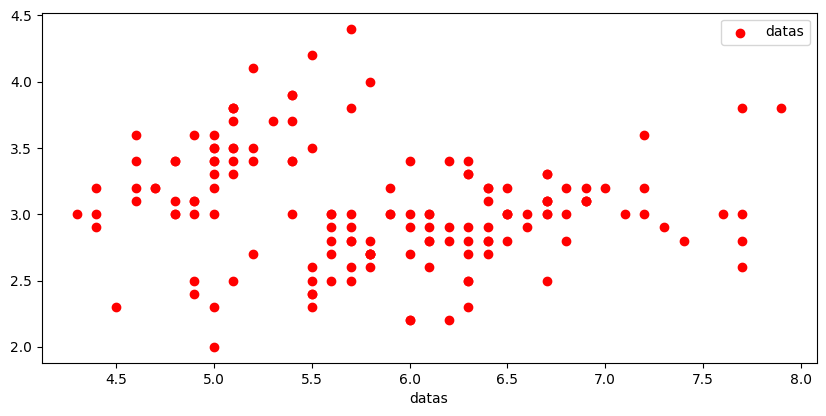

In [7]:
iris = datasets.load_iris()
x = iris.data[:, :4]
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(x[:, 0],x[:, 1],c="red",marker='o',label='datas')
plt.xlabel("datas")
plt.legend(loc=0)

In [8]:
clustering = DBSCAN(eps=0.7, min_samples=4).fit(x)
label_pred = clustering.labels_
print(label_pred)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


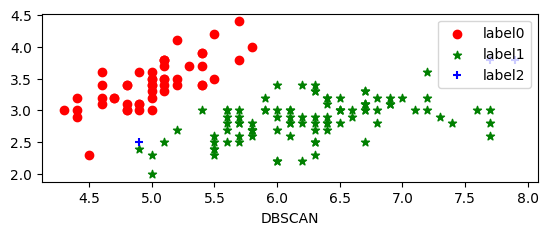

In [9]:
plt.subplot(2,1,2)
x0 = x[label_pred==0]
x1 = x[label_pred==1]
x2 = x[label_pred==-1]
plt.scatter(x0[:,0],x0[:,1], c="red", marker='o', label='label0')
plt.scatter(x1[:,0],x1[:,1], c="green", marker='*', label='label1')
plt.scatter(x2[:,0],x2[:,1], c="blue", marker='+', label='label2')
plt.xlabel('DBSCAN')
plt.legend(loc=0)

### Hierarchical Clustering(階層式分群)

- 初始時，把每筆數據自己當作一群  
    共 n 筆數據 => n 群
- 依距離去將兩群合為一群  
    距離最近的合為一群
- 群和群的距離
    - 樂觀：最近兩點距離
    - 悲觀：最遠的兩點距離
    - 綜合：任兩點距離 / n

In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
iris = datasets.load_iris()
x = iris.data[:,:4]
print(x.shape)

(150, 4)


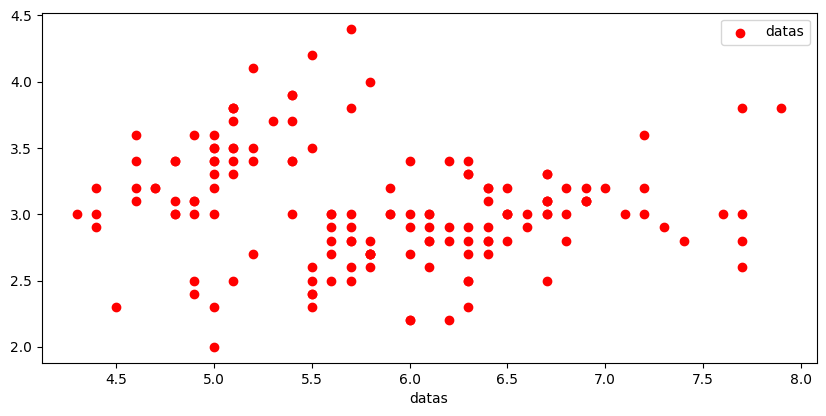

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(x[:, 0], x[:, 1], c="red", marker="o", label="datas")
plt.xlabel("datas")
plt.legend(loc=0)

In [13]:
clustering = AgglomerativeClustering(n_clusters=3).fit(x)
label_pred = clustering.labels_
print(label_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.4 2.9 4.3 1.3]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.  2.9 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.1 1.3]
 [5.5 2.5 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]
 [5.8 2.7 5.1 1.9]
 [4.9 2.5 4.5 1.7]
 [5.7 2.5 5.  2. ]
 [5.8 2.8 5.

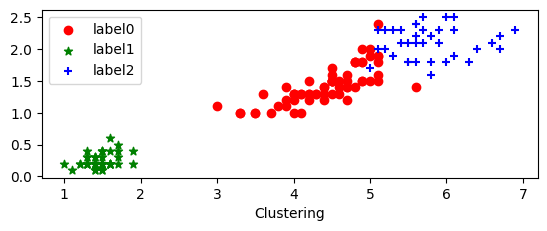

In [14]:
plt.subplot(2,1,2)
x0 = x[label_pred==0]
print(x0)
x1 = x[label_pred==1]
x2 = x[label_pred==2]
plt.scatter(x0[:, 2], x0[:, 3], c="red", marker="o", label="label0")
plt.scatter(x1[:, 2], x1[:, 3], c="green", marker="*", label="label1")
plt.scatter(x2[:, 2], x2[:, 3], c="blue", marker="+", label="label2")
plt.xlabel("Clustering")
plt.legend(loc=0)

## 分類法

### Decision Tree (決策樹)

- 每一中間 node 都是由 feature 所組成的條件
- 每一終站點，都是一個結果

- 收集數據 => 清洗 => 特徵工程 => 建立模型

* Overfitting
    模型太仰賴資料，以後該模型很難適應其他未看過的資料  
    泛化性不足  
    Model, 不夠 Generalize


- 資料集分割
    - training data
        - training data
        - validation data
    - testing data

In [15]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier # 提供 DT 的模型
from sklearn.model_selection import train_test_split # 用來分割資料
from sklearn.metrics import accuracy_score # 算分數
from sklearn.tree import export_text # 畫決策樹
from sklearn import metrics # 觀察混淆矩陣
import matplotlib.pyplot as plt
np.random.seed(47)

In [16]:
iris = datasets.load_iris(as_frame=True)
print("欄位名稱:", iris.feature_names)
print("標籤所有可能的值:", iris.target_names)
x = iris.data
y = iris.target
print(x.shape)
print(y.shape)

欄位名稱: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
標籤所有可能的值: ['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


* 資料集分割

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


* 定義模型與訓練模型

In [18]:
# criterion => 決定決策樹怎麼分支
decision_tree_clf = DecisionTreeClassifier(criterion='entropy')
decision_tree_clf = decision_tree_clf.fit(x_train, y_train)

* 透過文字顯示決策樹

In [19]:
feature_names=["花鄂長", "花鄂寬", "花瓣長", "花瓣寬"]
labels = ['setosa', 'versicolor',' virginica']
text_tree = export_text(decision_tree_clf, feature_names=list(feature_names))
print(text_tree)

|--- 花瓣寬 <= 0.80
|   |--- class: 0
|--- 花瓣寬 >  0.80
|   |--- 花瓣長 <= 5.05
|   |   |--- 花瓣寬 <= 1.65
|   |   |   |--- class: 1
|   |   |--- 花瓣寬 >  1.65
|   |   |   |--- 花鄂寬 <= 2.90
|   |   |   |   |--- class: 2
|   |   |   |--- 花鄂寬 >  2.90
|   |   |   |   |--- class: 1
|   |--- 花瓣長 >  5.05
|   |   |--- 花瓣寬 <= 1.70
|   |   |   |--- 花鄂長 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- 花鄂長 >  6.05
|   |   |   |   |--- class: 2
|   |   |--- 花瓣寬 >  1.70
|   |   |   |--- class: 2



In [20]:
y_predict = decision_tree_clf.predict(x_test)
score = accuracy_score(y_test, y_predict)
print("準確率:", score)

準確率: 0.94


* 混淆矩陣

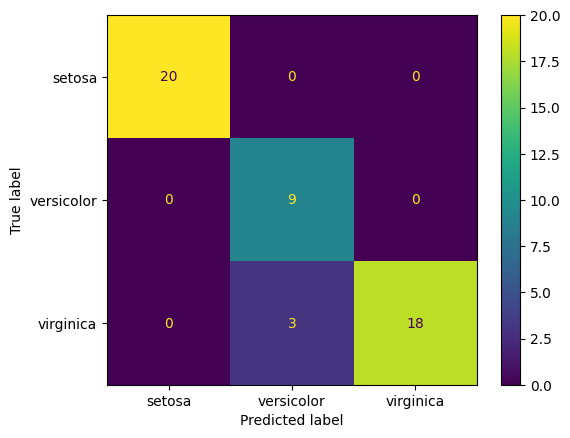

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
confusion_mat = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=iris.target_names)
disp.plot()
plt.show()

* 視覺化 Decision Tree

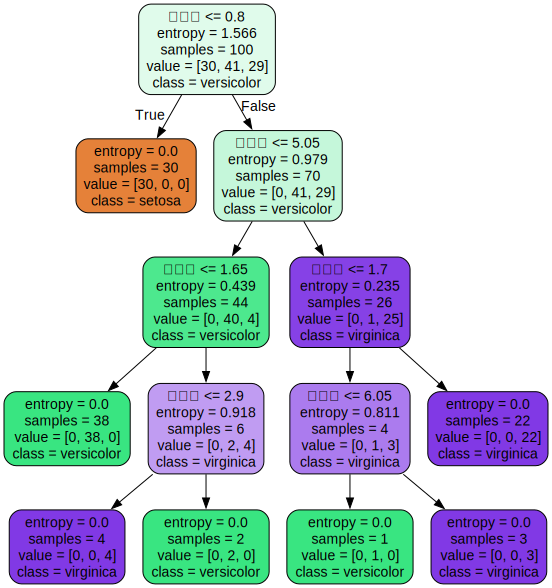

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree_clf, feature_names=feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

### Random Forest (隨機森林)

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
np.random.seed(10)
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
random_forest_clf = RandomForestClassifier(n_estimators=10)
random_forest_clf = random_forest_clf.fit(x_train, y_train)
y_predict = random_forest_clf.predict(x_test)
score = accuracy_score(y_test, y_predict)
print(y_test)
print(y_predict)
print(score)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 1 2 2 0 2
 2 2 2 0 0 1 0 1]
0.9777777777777777


### KNN(K-近鄰演算法)

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn import metrics
import matplotlib.pyplot as plt
np.random.seed(47)

In [26]:
iris = datasets.load_iris(as_frame=True)
print("欄位名稱:", iris.feature_names)
print("標籤所有可能的值:", iris.target_names)
x = iris.data
y = iris.target
print(x.shape)
print(y.shape)

欄位名稱: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
標籤所有可能的值: ['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(x_train, y_train)
feature_names=["花鄂長", "花鄂寬", "花瓣長", "花瓣寬"]
labels=['setosa', 'versicolor', 'virginica']

In [29]:
y_predict = knn_clf.predict(x_test)
score = accuracy_score(y_test, y_predict)
print("準確率:", score)

準確率: 0.98


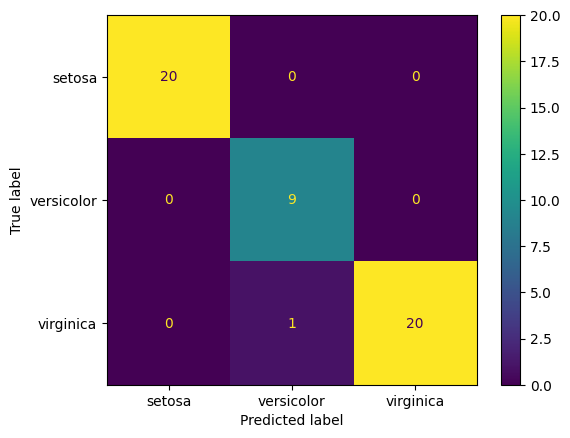

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
confusion_mat=confusion_matrix(y_test, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=iris.target_names)                         
disp.plot()
plt.show()